In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [3]:
train=pd.read_csv('train.csv')
y_true=pd.read_csv('gender_submission.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.duplicated().sum()

0

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test.shape

(418, 11)

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test.duplicated().sum()

0

In [12]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## data cleaning and EDA section

In [13]:
train.drop(columns=['Cabin','Name','Ticket','PassengerId'],inplace=True)

In [14]:
test.drop(columns=['Cabin','Name','Ticket','PassengerId'],inplace=True)

In [15]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
train['Age']=train['Age'].fillna(train['Age'].mode()[0])

In [17]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
train_=train.query('Survived==1')
train_=train_.loc[:,('Survived','Sex')]
train_.head()

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female


In [20]:
survived_sex=train_.groupby(['Sex']).count().reset_index()

Text(0.5, 1.0, 'Who is the highest number of dead in terms of gender?')

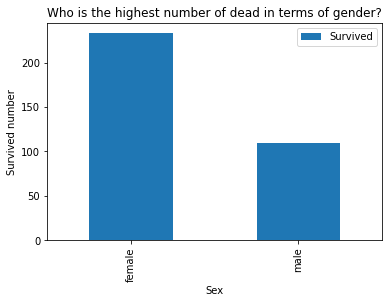

In [21]:
survived_sex.plot.bar(x='Sex',y='Survived')
plt.xlabel('Sex')
plt.ylabel('Survived number')
plt.title('Who is the highest number of dead in terms of gender?')

Text(0.5, 1.0, 'Who is higher than the dead or the survived?')

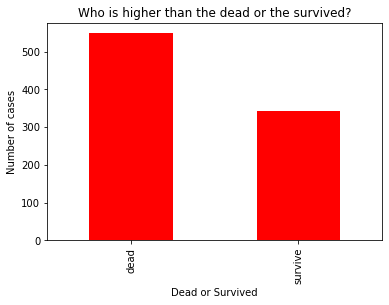

In [22]:
sur=pd.DataFrame(train['Survived'])
for i in range(sur.shape[0]):
    if sur['Survived'][i]==0:
        sur['Survived'][i]='dead'
    else:
        sur['Survived'][i]='survive'
sur['Survived'].value_counts().plot.bar(color='r')
plt.xlabel('Dead or Survived')
plt.ylabel('Number of cases')
plt.title('Who is higher than the dead or the survived?')

In [23]:
test['Age'].fillna(test['Age'].mode()[0],inplace=True)

In [24]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


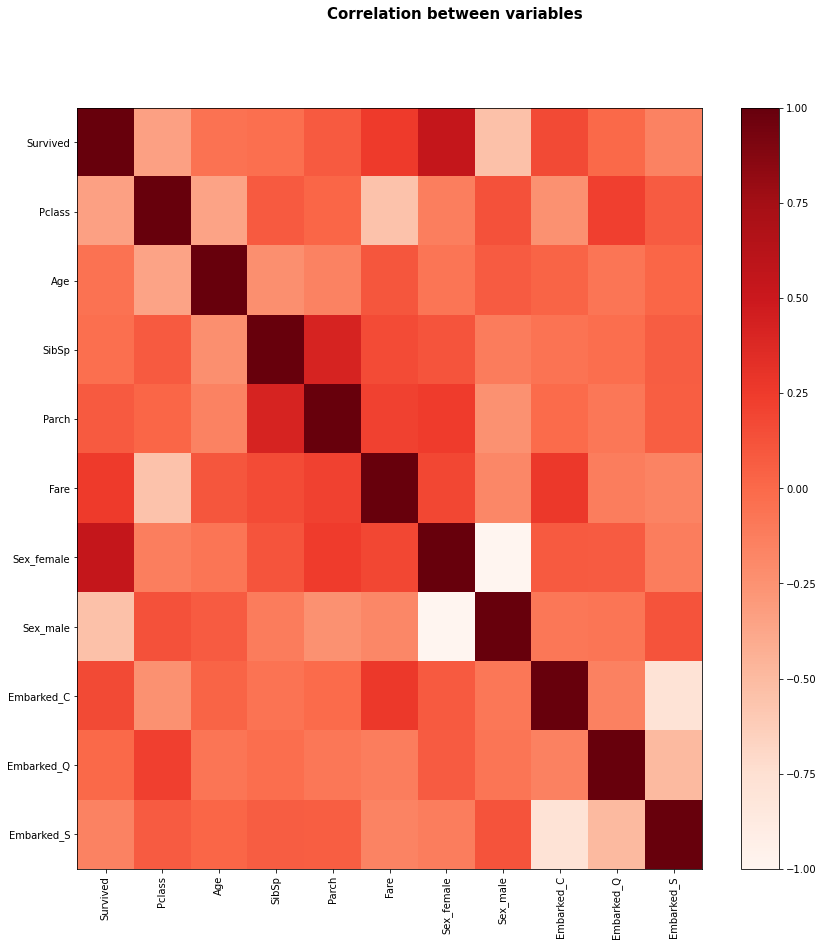

In [26]:
correlarion = train.corr()
plt.figure(figsize=(14, 14))
plt.imshow(correlarion, cmap='Reds', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlarion)), correlarion.columns, rotation='vertical')
plt.yticks(range(len(correlarion)), correlarion.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

## Machine learning model

#### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [28]:
logistic_regression_2=LogisticRegression(solver='sag',max_iter=10000,C=0.5)
logistic_regression_2.fit(train.loc[:,'Pclass':],train['Survived'])
y_pre_2=logistic_regression_2.predict(test)
print(accuracy_score(y_true['Survived'],y_pre_2))

0.9736842105263158


In [42]:
y_pre_2=pd.DataFrame(y_pre_2)

In [45]:
y_pre_2.columns=['PassengerId','Survived']

In [46]:
y_pre_2.to_csv('Prediction.csv')

In [48]:
y_pre_2.iloc[0:0]

,PassengerId,Survived


In [37]:
passe=pd.read_csv('test.csv')

In [38]:
y_pre_2.insert(0,'PassengerId',passe['PassengerId'])